_____________________
## [Recursos para Series de Tiempo - Python:](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html?highlight=datetime)
_____________________

# Federico Torres - Proyecto 03 - Series de Tiempo

#### DATASET: Flujo Vehicular por Unidades de Peaje AUSA
_____________

Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019. En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar. **Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

#### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

#### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

##### ¡Tómate tiempo para investigar y leer mucho!

________________
### 1. Preparación del Dataset - Acámica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
periodo           812153 non-null int64
fecha             812153 non-null object
hora_inicio       812153 non-null int64
hora_fin          812153 non-null int64
dia               812153 non-null object
estacion          812153 non-null object
sentido           812153 non-null object
tipo_vehiculo     812153 non-null object
forma_pago        812153 non-null object
cantidad_pasos    812153 non-null int64
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
periodo           1375908 non-null int64
fecha             1375908 non-null object
hora_inicio       1375908 non-null int64
hora_fin          1375908 non-null int64
dia               1375908 non-null object
estacion          1375908 non-null object
sentido           1375908 non-null object
tipo_vehiculo     1375908 non-null object
forma_pago        1375908 non-null object
cantidad_pasos    1375908 non-null int64
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
periodo           1372645 non-null int64
fecha             1372645 non-null object
hora_inicio       1372645 non-null int64
hora_fin          1372645 non-null int64
dia               1372645 non-null object
estacion          1372645 non-null object
sentido           1372645 non-null object
tipo_vehiculo     1372645 non-null object
forma_pago        1372645 non-null object
cantidad_pasos    1372645 non-null int64
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


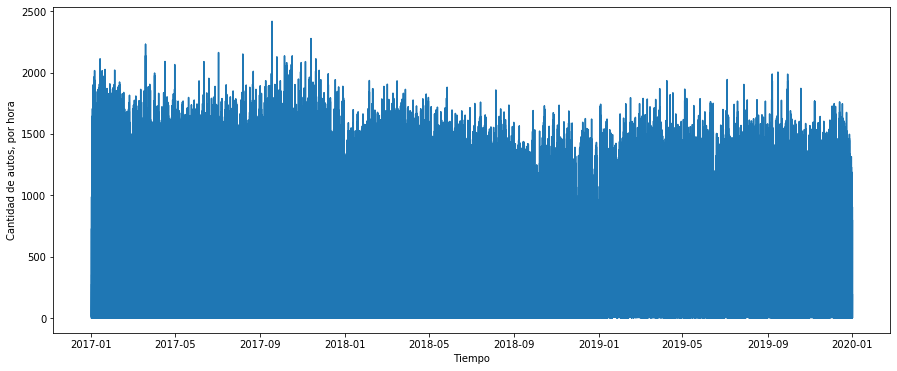

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


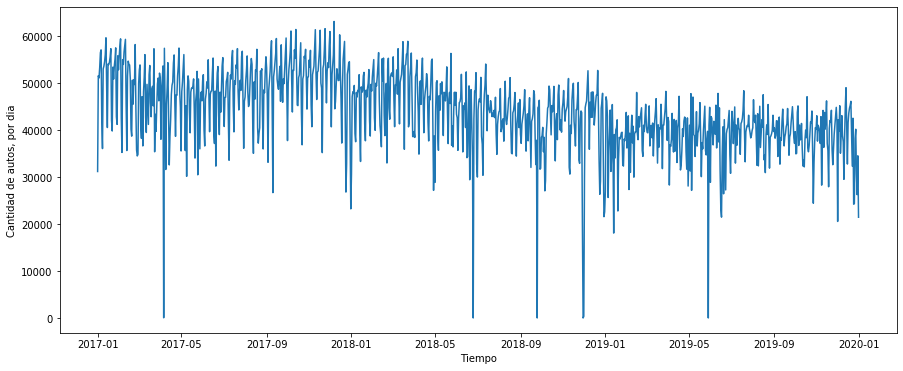

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [17]:
backup = dataset.copy()
backup_diario = diario.copy()

_______________________________________
_______________________________________

## PARTE A - EXPLORACION DE DATOS Y PREPROCESAMIENTO

#### Limpieza de Outliers:

Antes de poder responder preguntas apropiadas con el dataset y continuar analizando datos, necesitamos limpiarlo el dataset, para no obtener respuestas incorrectas o distorsiones y  distinguir valores interesantes y explorar los datos.  Así que comenzamos con la serie diaria escalando sus datos y analizando outliers.

Primero vamos a evaluar si encontramos _outliers generales_ para esto vaos a tomar en cuenta toda la serie.   

La manera mas simple que encontré es la siguiente: 

In [18]:
from sklearn.preprocessing import StandardScaler as sc

In [19]:
diario['sc_general'] = sc().fit_transform(diario)
diario.query("sc_general > 3 or sc_general <-3")

,cantidad_pasos,sc_general
fecha,,
2017-04-06,40,-5.333116
2018-06-25,0,-5.338000
2018-09-25,0,-5.338000
2018-11-30,0,-5.338000
2018-12-01,350,-5.295260
2019-01-13,18076,-3.130648
2019-05-29,0,-5.338000


Esto nos dice que, en principio, estas fechas son las atípicas con la regla de las 3 sigmas tomando en cuenta los 3 años. Sea por errores de carga, o valores extremos por algun comportamiento particular.  

Sin embargo puede ser que al calcular outliers filtrando distintos años, por separado, encontremos con otros criterios, otros outliers y comportamientos.  

Ahora recalcularemos outliers, pero tomando en cuenta años individuales.  

Para eso usaremos el formato `DateTime` y sus opciones de filtrado de especiales de `DateTimeIndex` para poder filtrar las fechas y recalcular `outliers` calibrando por año:

In [20]:
diario_18 = diario['2018-01-01':'2018-12-31']
diario_19 = diario['2019-01-01':'2019-12-31']

# Calibro cada estandarizacion por año 
sc_18 = sc().fit(pd.DataFrame(diario_18.cantidad_pasos))
sc_19 = sc().fit(pd.DataFrame(diario_19.cantidad_pasos))

# Estandarizo y creo columnas según la calibracion por año
diario['sc_18'] = sc_18.transform(pd.DataFrame(diario.cantidad_pasos))
diario['sc_19'] = sc_19.transform(pd.DataFrame(diario.cantidad_pasos))

Obtenemos los siguientes resultados, dependiendo el escalado de datos utilizado: 

In [21]:
# Distintos Filtros con criterios de Outliers diferentes
d_g = diario.query('(sc_general > 3 or sc_general <-3)')
d_18 = diario.query('(sc_18 >3 or sc_18 <-3)')
d_19 = diario.query('(sc_19 >3 or sc_19 <-3)')

print("ESCALADO COMPLETO:\n", d_g , "\n"); 
print("ESCALADO segun Año 2018:\n", d_18, '\n'); 
print("ESCALADO segun Año 2019:\n", d_19, '\n'); 

ESCALADO COMPLETO:
             cantidad_pasos  sc_general     sc_18     sc_19
fecha                                                     
2017-04-06              40   -5.333116 -5.459599 -6.990542
2018-06-25               0   -5.338000 -5.464596 -6.997780
2018-09-25               0   -5.338000 -5.464596 -6.997780
2018-11-30               0   -5.338000 -5.464596 -6.997780
2018-12-01             350   -5.295260 -5.420874 -6.934446
2019-01-13           18076   -3.130648 -3.206557 -3.726854
2019-05-29               0   -5.338000 -5.464596 -6.997780 

ESCALADO segun Año 2018:
             cantidad_pasos  sc_general     sc_18     sc_19
fecha                                                     
2017-04-06              40   -5.333116 -5.459599 -6.990542
2018-06-25               0   -5.338000 -5.464596 -6.997780
2018-09-25               0   -5.338000 -5.464596 -6.997780
2018-11-29           19728   -2.928914 -3.000190 -3.427917
2018-11-30               0   -5.338000 -5.464596 -6.997780
2018-12-

Vemos que los resutlados de la limpieza segun escalado, son disimiles. 

Tanto el escalado general (todo el dataset), como el escalado realizado con 2018 muestran `outliers` aproximadamente similares.   

Este último suma solo una fecha más; el 29 Noviembre de 2018.

In [22]:
# Diferencia entre el nuevo escalado 2018 y el Dataset completo original

set(d_18.index).difference(set(d_g.index))


{Timestamp('2018-11-29 00:00:00')}

Sin embargo, el escalado con 2019 llama la atención; marca como `outliers` muchas mas observaciones que las anteriores.

In [23]:
diferencia = set(d_19.index).difference(set(d_18.index))

# Diferencias entre el nuevo escalado 2019 y escalado 2018
print("Cantidad de diferencias: ", len(diferencia), "\n")

list(diferencia)[:10]

# Muchas fechas diferentes, en total son 77

Cantidad de diferencias:  77 



[Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2018-03-23 00:00:00'),
 Timestamp('2017-09-08 00:00:00'),
 Timestamp('2017-11-03 00:00:00'),
 Timestamp('2017-10-12 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-04-28 00:00:00'),
 Timestamp('2017-07-14 00:00:00'),
 Timestamp('2017-07-28 00:00:00')]

Agrupamos por año con `DateTimeIndex`, y los contamos:

In [24]:
d_19.groupby(d_19.index.year).size()

fecha
2017    62
2018    18
2019     5
dtype: int64

El resultado son muchisimos outliers en en año 2017; 62 en total. Esto no parece bien. Tal vez nos salvamos de cometer un error.  

Existen muchos casos de 2017 que están siendo marcados como outliers.  

Abrimos y miramos algunos `outliers` del año 2017, mes de febrero, para analizar:

In [25]:
#d_19['2017-01-01':'2017-03-31']
d_19[(d_19.index.month==2) & (d_19.index.year == 2017)]

,cantidad_pasos,sc_general,sc_18,sc_19
fecha,,,,
2017-02-01,55616,1.453553,1.482909,3.066163
2017-02-02,57795,1.719642,1.755108,3.460462
2017-02-03,59423,1.918445,1.958476,3.755055
2017-02-08,56618,1.575913,1.608078,3.247479
2017-02-09,57882,1.730266,1.765976,3.476205
2017-02-10,59319,1.905746,1.945485,3.736236
2017-02-24,58213,1.770686,1.807324,3.536101


Vemos que hay muchos casos consecutivos, tanto el 1,2 y 3 de Febrero como el 8,9 y 10 están marcados como atípicos. 

Seria ideal poder ver si rompen la serie o están dentro de la generalidad del mes de Febrero y del año 2017. Es decir, corroborar que tan outliers o no son. 

Para eso traigo la serie original. La que no está filtrada, y desde ahi selecciono la primer fraccion del año (para ver en contexto), es decir, Enero, Febrero, Marzo y Abril de 2017: 

Text(0.5, 0, 'FECHA')

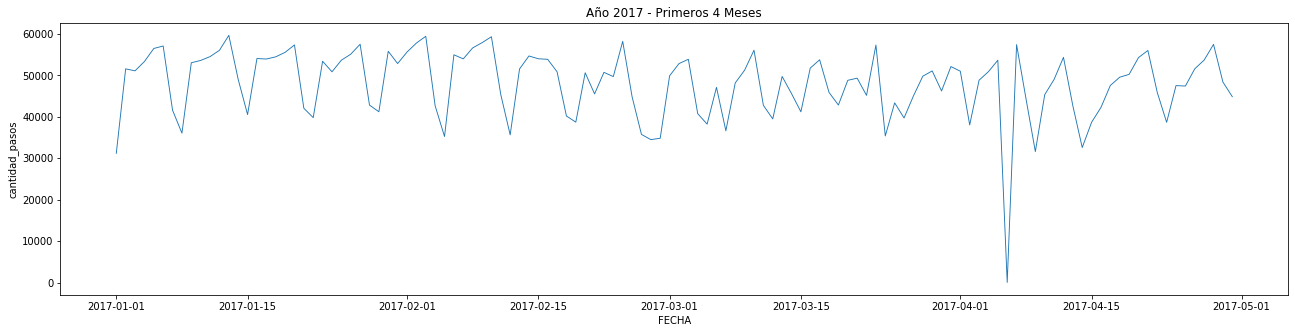

In [26]:
grafico = diario[(diario.index.year==2017) & (diario.index.month.isin([1,2,3,4]))]
plt.figure(figsize=(22,5))
sns.lineplot(x=grafico.index, y=grafico.cantidad_pasos, lw=0.9)
plt.title("Año 2017 - Primeros 4 Meses"); plt.xlabel("FECHA")

Ahora los valores especificos de la semana de Febrero a controlar:  

Text(0.5, 1.0, 'Febrero 2017 -  Primer Semana')

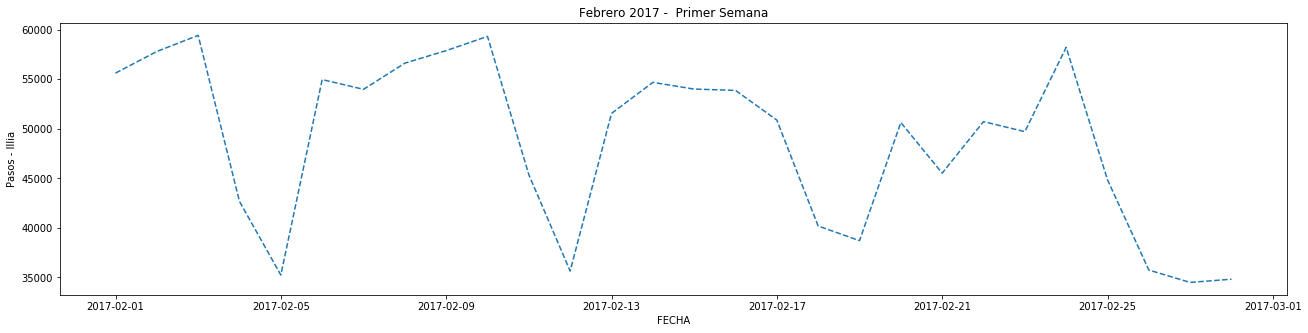

In [27]:
grafico = diario[(diario.index.year==2017) & (diario.index.month.isin([2]))]
plt.figure(figsize=(22,5))
plt.plot(grafico.index, grafico.cantidad_pasos, ls='--');plt.xlabel("FECHA"); plt.ylabel("Pasos - Illia"); 
plt.title("Febrero 2017 -  Primer Semana")

Como podemos ver, los valores marcados como outliers son de hecho valores normales de dias laborales de semana normal. Y no parecen romper para nada con la tendencia general de valores observados para estos meses. En el grafico anterior, en Abril, si se puede visualizar un outlier real, con valor `0`. Esto se da ya que los valores de viajes realizados en 2019, son visiblemente menores que los de 2017, por lo que al calcular el desvío de estas observaciones sobre la media de 2019, quedan alejadas de la normalidad de 2019. 

Pero no podemos decir que los valores que señala este escalado de datos sean atípicos para una semana laboral corriente en Verano en la Ciudad de Buenos Aires. 

In [28]:
#en Memoria: puedo manipular en memoria, hacer CASE WHEN si tengo una condicion poner un 0 y si no obtener el valor final que quiero y asi obtener la cantidad de pasos
diario['out_19']= np.where((diario.sc_19 >3) | (diario.sc_19 <-3) , diario.cantidad_pasos, np.nan); diario

,cantidad_pasos,sc_general,sc_18,sc_19,out_19
fecha,,,,,
2017-01-01,31183,-1.530085,-1.569241,-1.355088,NaN
2017-01-02,51568,0.959231,0.977236,2.333661,NaN
2017-01-03,51093,0.901227,0.917900,2.247708,NaN
2017-01-04,53332,1.174642,1.197594,2.652864,NaN
2017-01-05,56486,1.559793,1.591589,3.223593,56486.0
...,...,...,...,...,...
2019-12-27,40182,-0.431171,-0.445094,0.273318,NaN
2019-12-28,30681,-1.591387,-1.631951,-1.445927,NaN
2019-12-29,26259,-2.131380,-2.184343,-2.246106,NaN


#### Visualizacion - Outliers 2019: 

Saque una vista general, marcando todos los puntos que se reconocen como outliers escalando con el año 2019, sobre el plot.

Se ve muy bien como la mayor parte de valores pico de 2017 son identificados como outliers (por lo que este metodo no nos sirve).

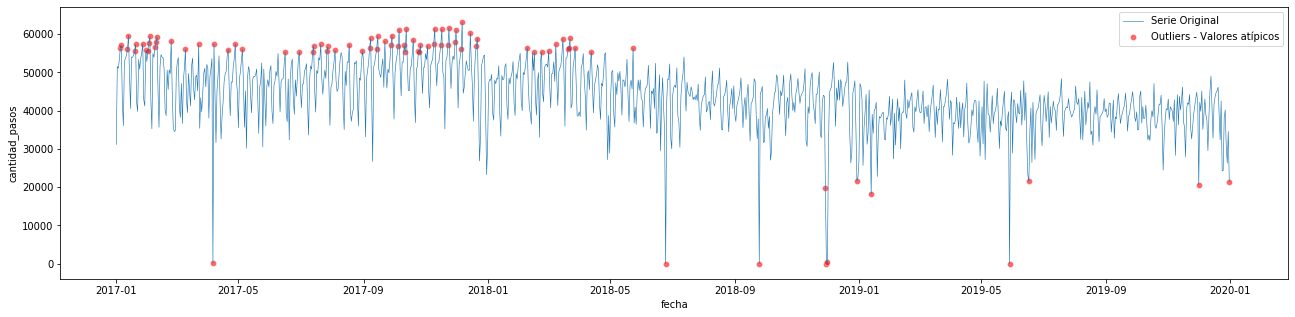

In [29]:
grafico = diario[(diario.index.year.isin([2017,2018,2019]))]
plt.figure(figsize=(22,5))
sns.lineplot(x=grafico.index, y=grafico.cantidad_pasos, lw=0.6, label="Serie Original")
sns.scatterplot(x=diario.index, y=diario.out_19, color='r', alpha=0.6, label="Outliers - Valores atípicos");
plt.legend();

Conclusión: No pareciera ser que las fechas de Febrero de 2017, o resto del año fuesen _realmente atípicas_. Vamos a descartar este escalado de 2019 y nos vamos a quedar con el escalado de 2018 (que es consistente con el general y ademas forma parte del año que queremos evaluar).

#### Tratamiento de Outliers:  
Tomaremos entonces los outliers del escalado de 2018 y los reemplazarlos para poder usar la serie. Para eso contamos con distintas estrategias. Primero borramos los outliers:

In [30]:
diario.loc[(diario.sc_18 > 3) | (diario.sc_18<-3),'cantidad_pasos'] = np.nan

In [31]:
diario[diario.cantidad_pasos.isna()]

,cantidad_pasos,sc_general,sc_18,sc_19,out_19
fecha,,,,,
2017-04-06,NaN,-5.333116,-5.459599,-6.990542,40.0
2018-06-25,NaN,-5.338000,-5.464596,-6.997780,0.0
2018-09-25,NaN,-5.338000,-5.464596,-6.997780,0.0
2018-11-29,NaN,-2.928914,-3.000190,-3.427917,19728.0
2018-11-30,NaN,-5.338000,-5.464596,-6.997780,0.0
2018-12-01,NaN,-5.295260,-5.420874,-6.934446,350.0
2019-01-13,NaN,-3.130648,-3.206557,-3.726854,18076.0
2019-05-29,NaN,-5.338000,-5.464596,-6.997780,0.0


#### Series de tiempo y datos faltantes 
Averiguando sobre series de tiempo y valores faltantes, y sabiendo que en Series de tiempo no puedo descartar valores (ya que cada fecha es unica y depende de la anterior) tenemos 2 maneras basicas de rellenar valores faltantes. Una es la vista en clase `fillna(method='ffill')` que es una simple repeticion de los ultimos valores hacia adelante. Esto puede distorsionar un poco la direccion de los movimientos (ver grafico mas adelante). Por otro lado, tenemos la funcion `pd.interpolate()` creo que un poco más apropiada para estos casos y series de tiempo; en vez de trabajar con un _pegado_ de datos anteriores, algo distorsivo, rellena los espacios faltantes de manera proporcional, conectando las dos puntas, de datos presentes. En este caso me pareció mejor metodología que la vista en clase con `pd.fillna(method='ffill')` para este caso de uso.

**Nota:** Aparentemente la gran cantidad de outliers se debe en principio a feriados. Nos dimos cuenta de esto posterior a la definicion de la estrategia para enmendar estas observaciones. Queda como item pendiente, para futuras mejoras la posibilidad de identificar estas observaciones, de alguna manera, con una variable dummy, de manera de poder incorporarlas al modelo y tener predicciones mas precisas. Por ahora el modelo no tendrá en cuenta feriados y estas observaciones serán rellenadas para realizar un modelo de serie de tiempo 'clasico', solo basado en un periodo de n-observaciones anteriores.

#### Demostracion de Trabajo con Interpolacion  

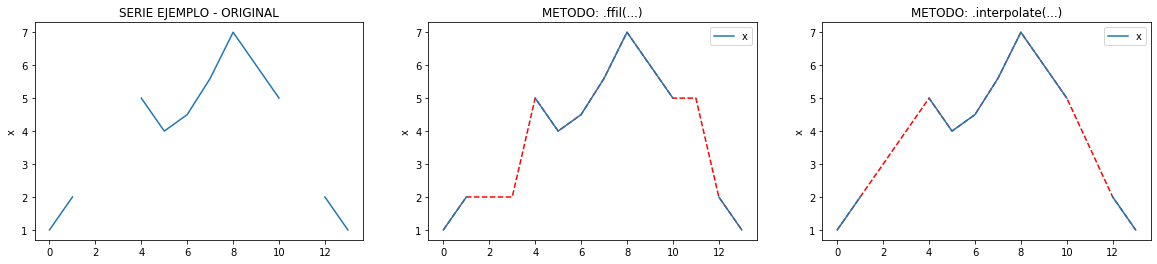

In [32]:
#Suponiendo que tengo la siguiente serie de datos 
points= pd.DataFrame({'x':[1,2,np.nan, np.nan, 5, 4, 4.5, 5.6, 7, 6,5,np.nan, 2, 1]})

plt.figure(figsize=(20,4))
plt.subplot(131)
# Grafico la serie con faltantes original
sns.lineplot(data=points.x); plt.title("SERIE EJEMPLO - ORIGINAL")

# Relleno con las diferentes metodologías
points_inter = points.interpolate(method='linear')
points_ffill = points.fillna(method='ffill') #method='ffill'


# Ploteo Resultados
plt.subplot(132); plt.title("METODO: .ffil(...)"); sns.lineplot(x=points_ffill.x.index, y=points_ffill.x, color='r', ls='--'); sns.lineplot(data=points) ; 
plt.subplot(133); plt.title("METODO: .interpolate(...)"); sns.lineplot(x=points_inter.x.index, y=points_inter.x, color='r', ls='--'); sns.lineplot(data=points) ; 


In [33]:
diario.loc[:,'cantidad_pasos']= diario.cantidad_pasos.interpolate()

La cantidad de valores nulos presentes en `cantidad_pasos` pasa a ser cero: 

In [34]:
diario.isna().sum()

cantidad_pasos       0
sc_general           0
sc_18                0
sc_19                0
out_19            1010
dtype: int64

### Preguntas - Exploracion de Datos - Serie de Tiempo:  

Una vez realizado esto, ya podemos empezar a evaluar la serie de manera real y realizar unas preguntas y exploracion de datos:

- Cual es la fecha con el mayor/menor trafico en la serie ? 
- Cual es la semana, mes y año con mayor/menor trafico?
- Cual es la variabilidad de estos periodos, y su desvio estandar general ? Es decir, que variación de viajes deberia esperar ?
- Con esos datos de resumen, se vislumbra una tendencia general ?

In [35]:
#Ordeno dataframe en base a cantidad de pasos por Illia de manera descendiente 
mayor = diario.sort_values(by='cantidad_pasos', ascending=False).head(5)
menor = diario.sort_values(by='cantidad_pasos', ascending=True).head(5)

print("\n","Fechas con MAYOR trafico:\n\n", mayor)
print("\n","Fechas con MENOR trafico:\n\n", menor)



 Fechas con MAYOR trafico:

             cantidad_pasos  sc_general     sc_18     sc_19   out_19
fecha                                                              
2017-12-07         63127.0    2.370760  2.421177  4.425309  63127.0
2017-11-24         61594.0    2.183557  2.229676  4.147906  61594.0
2017-10-13         61421.0    2.162431  2.208065  4.116601  61421.0
2017-11-10         61382.0    2.157669  2.203193  4.109544  61382.0
2017-11-17         61259.0    2.142649  2.187828  4.087287  61259.0

 Fechas con MENOR trafico:

             cantidad_pasos  sc_general     sc_18     sc_19   out_19
fecha                                                              
2019-12-01         20553.0   -2.828169 -2.897132 -3.278630  20553.0
2019-12-31         21447.0   -2.718998 -2.785454 -3.116857  21447.0
2019-06-17         21469.0   -2.716311 -2.782706 -3.112876  21469.0
2018-12-30         21559.0   -2.705321 -2.771463 -3.096590  21559.0
2018-12-31         22599.0   -2.578321 -2.641547 -2.9083

   
> 1.1 La fecha con mayor trafico parece ser el 7° de Diciembre de 2017 con # 63,127 pasos por Illia. Por otra parte, con esta tecnica de ordenado, ya nos vamos adelantando y podemos ver en el top 10 algunas repeticiones de meses de Noviembre, Octubre que aparecen repetidas veces._  

> 1.2 La fecha con menor trafico parece ser el 1° de Diciembre de 2019 con # 20,553 pasos por Illia.

In [36]:
# Resampleo serie, y obtengo viajes semanales 
semanal = diario.resample('W').sum()

# Ordeno por Mayor y Menor y saco resultados
mayor = semanal.sort_values(by='cantidad_pasos', ascending=0).head(3)
menor = semanal.sort_values(by='cantidad_pasos', ascending=1).head(3)

print("\n","Semanas con MAYOR trafico:\n\n", mayor)
print("\n","Semanas con MENOR trafico:\n\n", menor)



 Semanas con MAYOR trafico:

             cantidad_pasos  sc_general     sc_18      sc_19    out_19
fecha                                                                
2017-10-15        377832.0    8.772992  8.946291  19.385788  173776.0
2017-11-19        377263.0    8.703508  8.875212  19.282825  118512.0
2017-11-12        375644.0    8.505804  8.672968  18.989860  118881.0

 Semanas con MENOR trafico:

             cantidad_pasos  sc_general     sc_18     sc_19   out_19
fecha                                                              
2017-01-01         31183.0   -1.530085 -1.569241 -1.355088      0.0
2020-01-05         55970.0   -3.841218 -3.937465 -3.867559  21447.0
2019-12-29        226390.0   -9.720364 -9.971719 -8.018262      0.0


>2.1 La semana del 15 de Octubre de 2017 fue la que mas trafico agregó, seguida por la del 19 de Noviembre y 12 de Noviembre del mismo año.  

>2.2 La semana del 1° de Enero de 2017 fue la que menos trafico agregó, seguida por 5 Enero 2020 y 29 Diciembre de 2019.  



In [37]:
# Agruparé via DateTimeIndex Año y luego mes, para poder obtener el detalle de que par año-mes tiene mayores pasos:
mensual = diario.groupby(by=[diario.index.year, diario.index.month]).sum()

# Ordeno de Mayor a Menor y saco resultados
mayor = mensual.sort_values(by='cantidad_pasos', ascending=0).head(3)
menor = mensual.sort_values(by='cantidad_pasos', ascending=1).head(3)

print("\n","Meses con MAYOR trafico:\n\n", mayor)
print("\n","Meses con MENOR trafico:\n\n", menor)


 Meses con MAYOR trafico:

              cantidad_pasos  sc_general      sc_18      sc_19    out_19
fecha fecha                                                            
2017  10          1597356.0   29.583283  30.137924  72.116930  518499.0
      11          1581428.0   32.976234  33.612807  76.232473  471020.0
      1           1565260.0   25.663877  26.128518  66.309027  455465.0

 Meses con MENOR trafico:

              cantidad_pasos  sc_general      sc_18     sc_19   out_19
fecha fecha                                                          
2019  2           1103086.0  -14.760549 -15.212090  3.670091      0.0
      6           1116120.0  -23.844901 -24.513085 -7.966913  21469.0
      4           1143925.0  -20.449491 -21.039707 -2.935484      0.0


> 2.2 Los meses con mayor trafico parecen ser, sin ninguna duda Octubre, Noviembre y Enero de 2017 en ese orden. Con 1,597,356 viajes el primero, 1,581,428 el segundo y   1,565,260 el tercero.

In [38]:
# Agrupo via DateTimeIndex el Año y agrego
anual = diario.groupby(by=[diario.index.year]).sum()

# Ordeno de Mayor a Menor y saco resultados
anual.sort_values(by='cantidad_pasos', ascending=0).head(10)

,cantidad_pasos,sc_general,sc_18,sc_19,out_19
fecha,,,,,
2017,17839009.0,223.265286,2.269242e+02,6.638096e+02,3514083.0
2018,16137176.5,1.434893,6.439294e-14,3.350942e+02,720006.0
2019,14174524.5,-224.700179,-2.313277e+02,7.327472e-14,81545.0


> 2.3 Los Años llevan el siguiente ranking;   
   >>  1° - 2017 con 17,839,009 (17.8 millones)  
   >>  2° - 2018 con 16,137,176 (16.1 millones) y  
   >>  3° - 2019 con 14,174,524 (14.1 millones)

In [39]:
# Calculo de variabilidad de datos ; Desvío Estandar sobre grupos
std_dia = diario.std()
std_semana = semanal.std()
std_anio = diario.groupby(by=[diario.index.year]).std()

print("\n","- DESVIO DIARIO -SERIE COMPLETA-:\n\n", std_dia.cantidad_pasos, '\n')
print("\n","- DESVIO DIARIO -CALCULANDO POR AÑO-:\n\n", std_anio.cantidad_pasos)
print("\n","- DESVIO SEMANAL -SERIE COMPLETA-:\n\n", std_semana.cantidad_pasos)


 - DESVIO DIARIO -SERIE COMPLETA-:

 7472.356274313689 


 - DESVIO DIARIO -CALCULANDO POR AÑO-:

 fecha
2017    7056.734773
2018    6485.268665
2019    5033.635553
Name: cantidad_pasos, dtype: float64

 - DESVIO SEMANAL -SERIE COMPLETA-:

 45645.01534075624


> 4  Por el lado de las variaciones, encontramos que, tomando en cuenta toda la serie el desvío estándar es de `7,472` viajes/pasos por la Illia por dia. 
Si tomamos lso desvíos estándar calculandolo por año individual vemos que el año mas "variable" e inestable, fue justamente el que mas viajes tuvo; el año 2017 con `7,056` viajes de desvío estándar. Lo sigue el año 2018 con `6,485` y finalmente el año 2019 con `5,033` de fluctuaciones de viajes promedio diario. _**Conclusion:**_ A medida que los 'pasos' por la Illia se van reduciendo, hacia el año 2019 estos, pareciera que estos, por otro lado, se hacen mas estables y fluctuan menos.

In [40]:
#diario = diario.drop(columns=['sc_18', 'sc_19', 'out_19', 'sc_general'])

### Componentes de la serie - Serie de Tiempo:  

Pasamos a la parte de analisis de los componentes de la serie. Empezaremos analizando la serie con medias moviles con el objetivo de percibir sus movimientos generales, es decir su tendencia general. Veremos esto manualmente con los 2 metodos mas utilizados disponibles. finalmente luego seguiremos utilizando StatsModels para poder fitear la media que mejor descomponga la serie y poder analizar por separado estos componentes. Finalmente, veremos si las intuiciones de nuestro analisis exploratorio EDA se confirman. 

#### <u>Tendencia - con MEDIA MOVIL:</u>

Probaremos con distintas ventanas para visualizar la tendencia. En primer lugar calcularemos la media movil a 1 mes (30 dias), luego a 3 meses (90 dias), y finalmente a 5 meses (150 dias). Creamos columnas para guardar los resultados y graficamos. Hacemos esto ya que podriamos usar distintas ventanas temporales para tratar de descomponer la seria, pero estos periodos parecen suficientes:

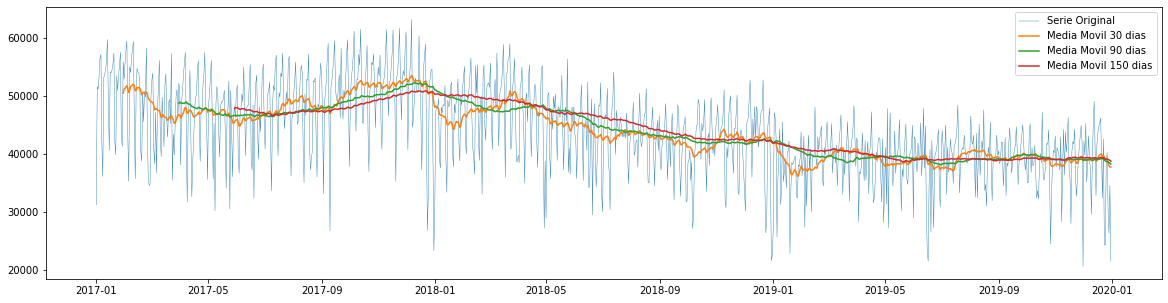

In [41]:
# Defino las operaciones de promedio sobre distintas ventanas a 30,90 y 150 dias
diario['movil_30'] = diario.loc[:,'cantidad_pasos'].rolling(window=30).mean()
diario['movil_90'] = diario.loc[:,'cantidad_pasos'].rolling(window=90).mean()
diario['movil_150'] = diario.loc[:,'cantidad_pasos'].rolling(window=150).mean()

# Grafico resultados y edito grafica
plt.figure(figsize=(20,5))
plt.plot(diario.cantidad_pasos, lw=0.4,  label='Serie Original')
plt.plot(diario.movil_30, label='Media Movil 30 dias')
plt.plot(diario.movil_90, label='Media Movil 90 dias')
plt.plot(diario.movil_150, label='Media Movil 150 dias')
plt.legend()

#### Resultados - Medias Moviles:    
Todas las ventanas capturan el movimiento general que es lo que en principio queremos analizar y se comportan de manera consitstente. De todas maneras, creo que la media movil a 90 dias es la que menos "ruido" tiene (variaciones a corto plazo) y la que no pierde tanta información. Usaremos esa para este analisis de tendencia parcial, pero en general creo que todas son validas en esta instancia, al menos ahora, para analizar que sucede con la serie sin tener la necesidad de ajustar un modelo de la mejor manera ni analizar sus residuos.  

En la clase se detallo que las ventanas deben ser lo suficientemente grandes, preguntandonos que eran suficientes. Entiendo que tiene que ser lo suficientemente grande como para obtener una tendencia que descomponga la serie mejor y obtener un mejor ruido estadistico final. Pero para el caso en cuestion, de descripción y analisis, cualquiera podría servirnos para percibir la tendencia general. 

#### Analisis General - Medias Moviles:  
En principio, con la Media Movil a 90 días podemos observar una tendencia decreciente a medida que nos acercamos al año 2019. Claro está que los valores de 2017 son muchos mas altos que los que continuan luego, en 2018, 2019 y principios de 2020 para el método de pago en efectivo. Esto bien puede ser por la migracion de pago hacia otros metodos como Telepase. Por otra parte, a pesar que vislumbramos esta caida a largo plazo, la media movil a 90 dias (aprox ~3 meses) nos permite vislumbrar comportamientos ciclicos estacionales; por ejemplo a final de cada año, llegando diciembre, el tráfico  anual recibe un aumento relativo de trafico y pagos en efectivo. Lo mismo sucede rondando los meses de Abril-Mayo de cada año. 

#### <u>Tendencia - con REGRESION:</u>  
Haremos el mismo analisis de tendencia con la segunda metodologia posible, ajustando una relacion lineal simple, para ver si lo anterior se comprueba y es consistente:

In [42]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal); diario.tail()

,cantidad_pasos,sc_general,sc_18,sc_19,out_19,movil_30,movil_90,movil_150,fecha_numeros
fecha,,,,,,,,,
2019-12-27,40182.0,-0.431171,-0.445094,0.273318,NaN,38947.600000,38627.333333,39058.913333,737420
2019-12-28,30681.0,-1.591387,-1.631951,-1.445927,NaN,38532.633333,38542.144444,38997.426667,737421
2019-12-29,26259.0,-2.131380,-2.184343,-2.246106,NaN,37913.233333,38420.911111,38902.533333,737422
2019-12-30,34523.0,-1.122221,-1.152011,-0.750702,NaN,37673.266667,38363.733333,38822.900000,737423
2019-12-31,21447.0,-2.718998,-2.785454,-3.116857,21447.0,37703.066667,38213.777778,38684.880000,737424


In [43]:
# Tendencia con Regresion
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

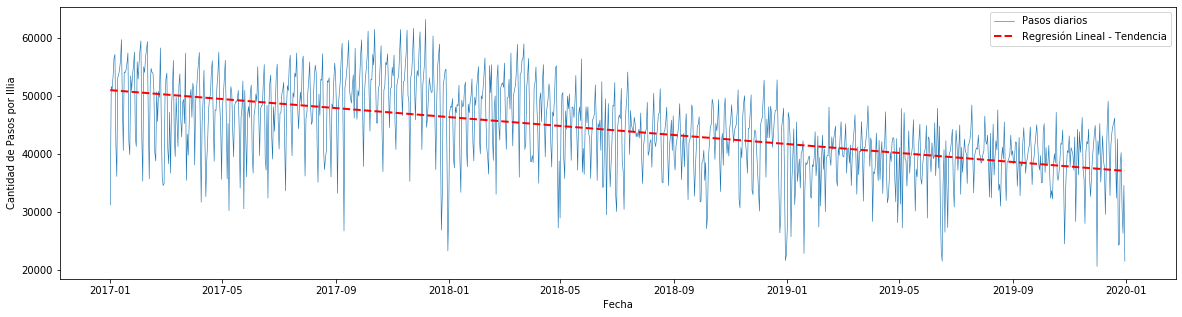

In [44]:
plt.figure(figsize = (20,5))
plt.plot(diario.index, diario.cantidad_pasos, lw=0.6, label = 'Pasos diarios')
#plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Pasos Promedio - Media Movil')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), '--', c='r', lw = 2, label = 'Regresión Lineal - Tendencia')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos por Illia')
plt.legend()
plt.show()

#### Análisis de Tendencia General - Regresión Lineal:  
Por el lado de la relacion lineal la conclusión es mucho mas obvia, aunque no tan rica en informacion extra (no percibe patrones a corto y mediano plazo). Podemos ver que la recta de mejor ajuste que reduce el error de todas las observaciones es una recta con clara pendiente negativa, es decir que promediando, entre el año 2017 y 2018 y 2019 encontramos una caida generalizada de la cantidad de viajes pagados en Efectivo en la autopista Illia. 

#### Tendencias - Conclusiones Generales:  
A priori podemos ver que con ambas metodologias, tanto las medias móviles calculadas a mano y como la regresión lineal se vislumbra una tendencia general negativa sobre la cantidad de pasos por acceso Illia y pagos realizados en Efectivo. Las regresión lineal es un poco mas dura, mientras que las medias moviles permiten capturar un poco mas movimientos estacionales

### Descomposicion total - Stats Models:  

Finalmente usaremos Stats models para encontrar el mejor ajuste y descomponer la serie en todos sus partes. Seguiremos el modelo aditivo simple de clase:

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

st = seasonal_decompose(diario.cantidad_pasos, model='additive')

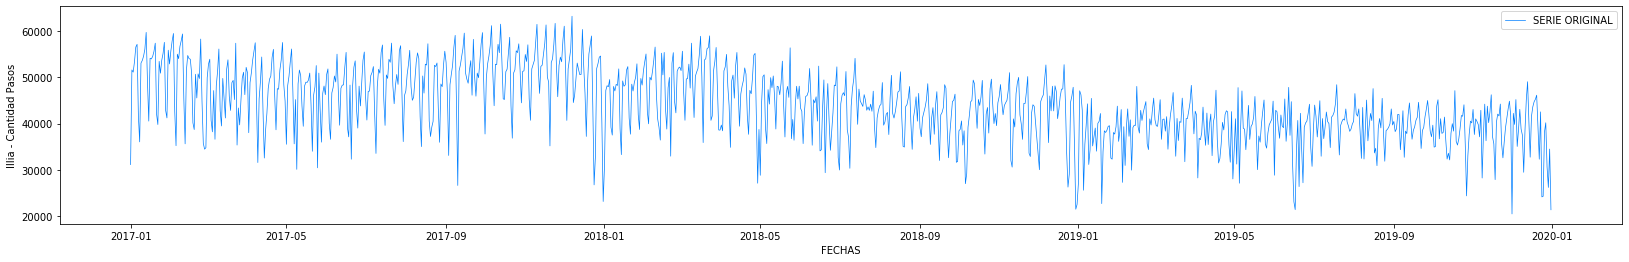

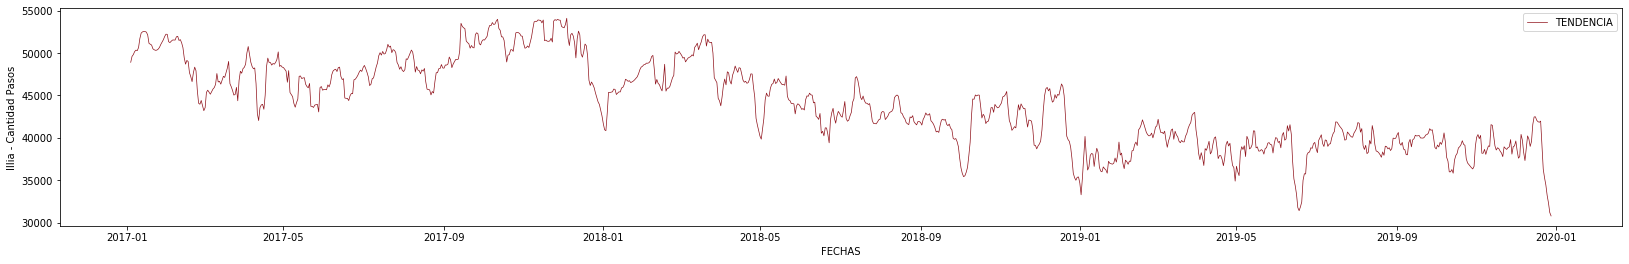

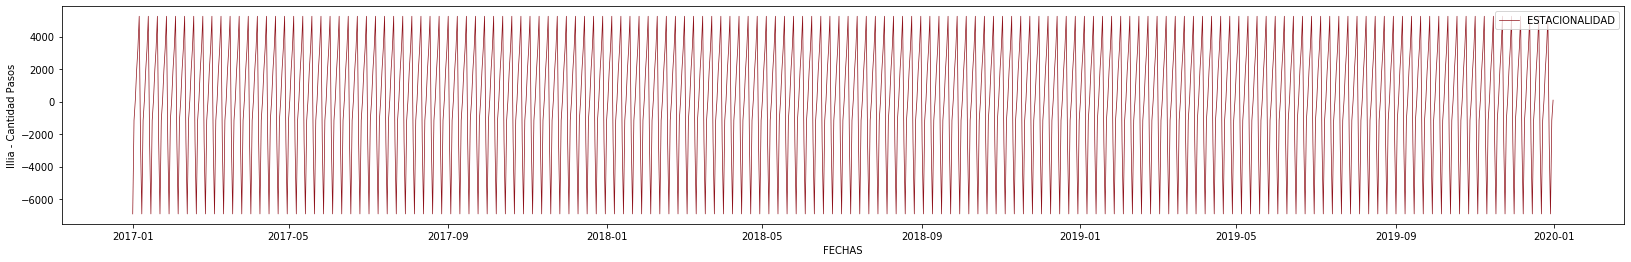

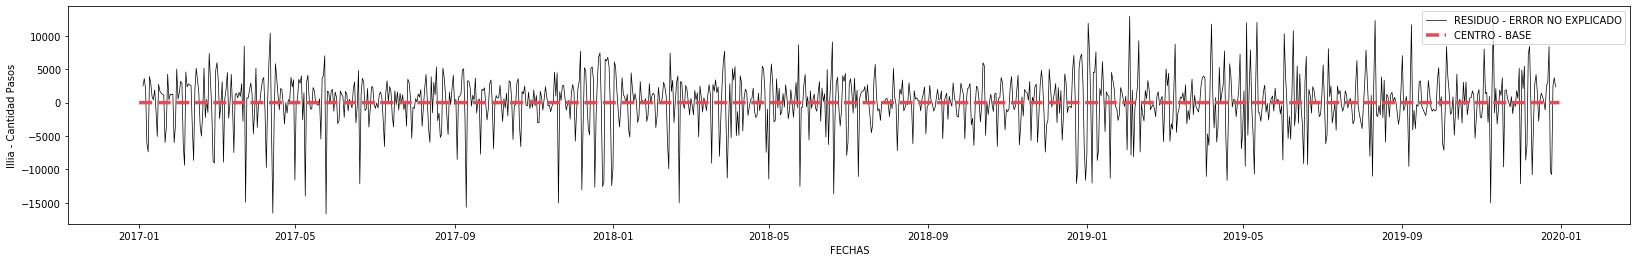

In [46]:
# GRAFICADO
ancho, alto, grosor = 28,4, 0.7
plt.figure(figsize=(ancho,alto)); 
sns.lineplot(x=st.observed.index, y=st.observed, color = '#007FFF', lw=grosor, label= "SERIE ORIGINAL"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS"); plt.show()
plt.figure(figsize=(ancho,alto)); 
sns.lineplot(x=st.trend.index, y=st.trend, color = '#8F111A', lw=grosor, label= "TENDENCIA"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS") ; plt.show()
plt.figure(figsize=(ancho,alto)); # #D95059
sns.lineplot(x=st.seasonal.index, y=st.seasonal, lw=grosor, color = '#8F111A',label= "ESTACIONALIDAD"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS") ; plt.show()
plt.figure(figsize=(ancho,alto)); 
sns.lineplot(x=st.resid.index, y=st.resid, lw=grosor, color = '#000000', label= "RESIDUO - ERROR NO EXPLICADO"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS") ; 
sns.lineplot(x=st.resid.index, y=np.zeros(st.resid.shape[0]), ls='--', lw=3.5, color = '#D95059', label='CENTRO - BASE')
plt.show()


#### Descomposicion - Análisis de Estacionalidad
Ahora descompondremos la serie resultante y analizaremos la estacionalidad para interpretar lo que resultó.  Si hacemos foco en una semana tipica, por ejemplo una semana de Noviembre del año 2018, podemos ver cual su estacionalidad particular, analizado sus picos y valles, y los patrones que estos nos muestran y el modelo detecta. 

(737002.0, 737009.0)

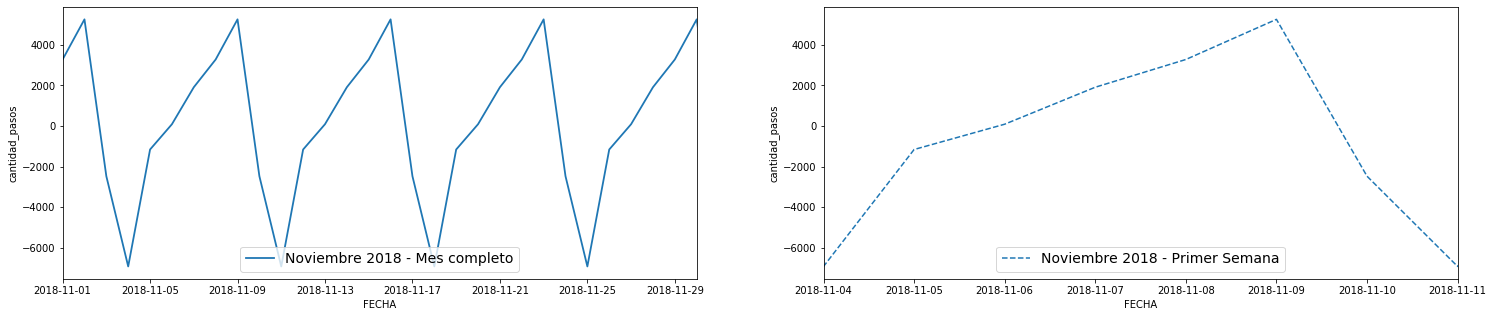

In [47]:
plt.figure(figsize=(25,5))
a1=plt.subplot(121)
#plt.plot(np.zeros(st.seasonal.size) , c='r')
sns.lineplot(data=st.seasonal, lw=1.8, label='Noviembre 2018 - Mes completo'); 
plt.xlabel("FECHA"); a1.legend(loc='lower center', fontsize=14)

plt.xlim('2018-11-01', '2018-11-30')
a2=plt.subplot(122)
sns.lineplot(data=st.seasonal, ls='--', label='Noviembre 2018 - Primer Semana'); 
plt.xlabel("FECHA"); a2.legend(loc='lower center', fontsize=14)
plt.xlim('2018-11-04', '2018-11-11')
#plt.legend(['Mes asd', 'Semana'])

##### Grafico Izquierdo: _Mes completo:_
Vemos un mes completo de registros de pasos para el mes de Noviembre de 2018. Se perciben ciclos recurrentes, altas y bajas, picos y valles a lo largo del mes. Estos ciclos adicionan en sus picos aproximadaemtne +4,500 viajes y luego decaen variando negativamente en, aproximadamente -6,000 viajes. Este sería el comportamiento del ciclo estacionl sobre lo que vendria a ser la tendencia. Este ciclo se cumple 4 veces en el mes de Noviembre.  

##### Grafico Derecho:  _Primer Semana - Noviembre:_
Podemos, luego, ver el detalle de la semana del 5 de Noviembre. En donde se puede apreciar un alza significativa de los viajes ya el `05-11-2018`. Al investigar la fecha vemos que es un Lunes de un dia laboral, y tiene sentido que la autopista comienze a cargarse. La cantidad de pasos continuan en ascenso, constante, hasta llegar el viernes `09-11-2018`, en donde llega a su pico máximo y comienza, luego, su fase recesiva. De esto podemos concluir que la Autoposta Illia se carga progresivamente, a medida que transcurre la semana y además podemos intuir como es el funcionamiento del modelo;  como este explica luego, sus predicciones, y la lógica subyacente que usaremos para predecir.

#### Descomposición - Analisis de Residuos

1° Std Deviation:  4085.0
2° Std Deviation:  8170.0
3° Std Deviation:  12256.0


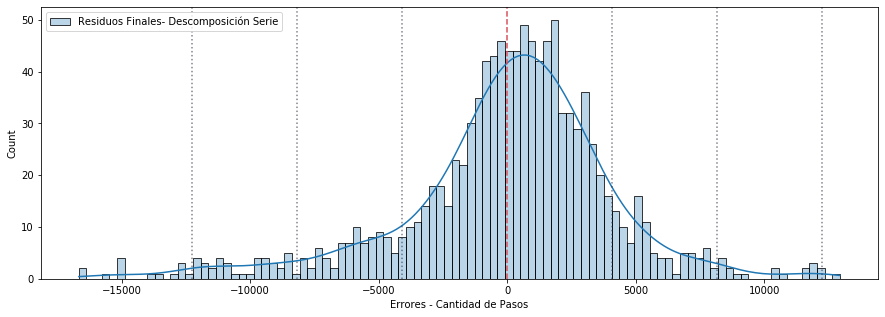

In [48]:
import seaborn as sns

dev=st.resid.std()
print("1° Std Deviation: ", np.around(dev))
print("2° Std Deviation: ", np.around(2*dev))
print("3° Std Deviation: ", np.around(3*dev))
#matplotlib.style.use('default')

label='Residuos Finales- Descomposición Serie'
plt.subplots(figsize=(15, 5))
sns.histplot(data=st.resid, bins=100, x=st.resid,label=label, kde=True, alpha=0.3);

# Ploteo desvíos estándar
plt.axvline(0, linestyle ='--', color= '#D95059') ; op=0.6
plt.axvline(dev, linestyle =':', color= '#2B2D42' , alpha=op )
plt.axvline(-dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(-2*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(2*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(-3*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(+3*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.xlabel('Errores - Cantidad de Pasos')
plt.legend();
#plt.xlim()


El analisis de residuos muestra que los errores se agrupan alrededor del cero, como es esperable. A pesar de eso, notamos 2 cosas:
- _#1 Que la cola del lado de los negativos es mas pronunciada (aunque con poco volumen)._  
- _#2 Que, por otro lado, existiría un volumen de observaciones mas alto en los primeros valores positivos (entre 0 y 4,000) que indicarían una _ligera subestimación_ _del modelo y del ajuste (es decir prediciria menos que los valores efectivos finales), variaciones positivas que no están siendo captadas por la formula $Err= Y-(Tendencia + Estacionalidad)$ correspondiente al modelo aditivo de StatsModels que es el que corrimos._ 

Sin embargo, dado el ajuste, este seria el mejor resultado provisto por la libreria y la metodologpia elegida, y los valores parecen ser dentro de todo consistentes. Mi hipótesis principal es que se puede deber a la incorporación del año 2017, con gran variabilidad y eso logra que a pesar de descomponer sustrayendo la tendencia y componente ciclico esperado, existan ciertos valores sobrantes generales del lado de los positivos luego, no capturados por esta medida de tendencia general. Una opción es reevaluar el modelo, pensandolo específicamente para el año en curso 2018, de interés y ver si eso tiene un efecto final sobre el modelo re residuos.

_______________
## PARTE B: MODELO - SERIE DE TIEMPO: Implementación One-Step Prediction

#### Metrica a utilizar  
Para la metrica elegimos el RMSE ya que hablamos de predecir una variable target numérica con valores continuos en base a atributos (valores anteriores de la serie), y el RMSE nos presenta una medida manejable e intuitiva de error en la propia variable original; apta para medir error de regresion con una variable discreta a predecir, y no penaliza demasiado errores grandes vs. los pequeños (como originalmente el MSE).

#### Benchmark a utilizar  
Haremos las comparaciones de los modelos contra los valores de la fecha inmediatamente anterior de la serie de tiempo. Una de las mas sencillas de utilizar e intuitiva en comprension.

#### Creacion de Matriz de atributos y target  
Para poder implementar este modelo tal cual visto en clase necesitamos readaptar los valores de la serie llevandolos a una estructura matricial que tenga la informacion de `look_back` para cada fecha `target` a predecir, como sus atributos. Comenzaremos a realizar esa estructura:

- `N = largo original serie a trabajar`
- `look_back = # periodos de lookback`
- `X = matriz valida de atributos resultantes`
- `y = vector valido de target`

In [49]:
N = diario.shape[0] # largo original de la serie (hasta 31 Diciembre 2019)

# CREACION DE MATRICES VACIAS
look_back = 6*30 # Periodos de 'lookback' a tomar (numero de fechas para predecir target) 
X = np.zeros((N-look_back-1, look_back)) # Matriz de atributos valida = (Cols) n fechas de lookback (Filas) Serie recortada a fechas que cumplen requisito 
y = np.zeros((N-look_back-1)) # Serie target valida 

#### Llenado de las Estructuras  
Una vez creadas las matrices vacias y serie target con las dimensiones que necesitamos, procedemos a insertar los datos:

In [50]:
# LLENADO DE DATOS
for i in range(X.shape[0]):
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back] # toma hasta el valor 180 sin incluirla
    y[i] = diario.cantidad_pasos.iloc[i+look_back] # toma la observacion 180 incluida

#### Implementacion de Test-Train Split + Cross Validation 
La division de la serie de tiempo en Test y Train y el muestreo aleatorio necesario para realizar Cross validation tienen una complejidad especial en este tipo de modelos que no implementamos en clase. En principio _"Existe una dependencia temporal entre las observaciones y necesitamos preservar esa relación al momento de obtener el valor final de testeo."_ [[Cita - Articulo medium- Link]](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4). Mi primer pensamiento, al encontrarme con esto fue que, dada la forma en la que está estructurada nuestra matriz basica, la misma hecha en clase (en donde cada target $y$ tiene adosada todas las observaciones del periodo de lookback pasado), se podria inclusive pensar en ignorar el problema y realizar una selección aleatoria de observaciones para `folds`, ya que cada target mantiene relación con su atributos mediante sus atributos de lookback, pudiendo aún asi obtener relaciones generales. 

Sin embargo, si comparamos esa opción ingenua contra la de seleccionar valores manteniendo las relacion secuencial entre targets, es decir sin alterar la estructura "natural" de dependencia mutua de las observaciones de una serie de tiempo, el modelo estaría mejor planteado y la calibración resultaria en una mayor efectividad para determinar relaciones y predecir valores inmediatamente futuros (lo cual es el objetivo). Se respetaría la inercia de la serie y todos los valores incorporados al train corresponderían a la historia reciente del segmento inmediatamente posterior a predecir; con una misma tendencia relativa, una estacionalidad acorde, y unos valores de desvíos generales parecidos. Por ende concluímos que nuestras `splits` deben ser eminentemente _temporales_ y respetar esas relaciones.

Habiendo consultado como abordar el **Train Test split + Cross Validation** para series de tiempo con mi mentor, elegiremos esta ultima opción, que es la adecuada para el trabajo con este tipo de datos. Para eso usaremos [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) de sklearn, especialmente diseñada para administrar este tipo de cortes temporales. _Agradecimientos a mi mentor que me facilitó los links necesarios para investigar y resolver este problema._


#### Cross Validation Model - _Forward Chain / Rolling model_:  
Realizaremos una seleccion de los datos de la matriz de Train usando Cross validation con Forward Chain para validar sus resultados. Esto implica ampliar de manera progresiva la toma del periodo de train, y luego testear contra el periodo de prueba inmediatamente posterior:  
![Time Series - Validacion Cruzada TP](https://i.stack.imgur.com/fXZ6k.png)


In [51]:
# Visualizamos Matriz original, shape y datos
print(X.shape[0], "filas,", X.shape[1], "columnas"); X

914 filas, 180 columnas


array([[31183., 51568., 51093., ..., 43811., 48559., 53626.],
       [51568., 51093., 53332., ..., 48559., 53626., 55433.],
       [51093., 53332., 56486., ..., 53626., 55433., 45628.],
       ...,
       [38705., 43996., 41613., ..., 24349., 38168., 40182.],
       [43996., 41613., 37124., ..., 38168., 40182., 30681.],
       [41613., 37124., 40815., ..., 40182., 30681., 26259.]])

#### Realizacion de corte de Cross validation

In [52]:
from sklearn.model_selection import TimeSeriesSplit

In [53]:
tss = TimeSeriesSplit(n_splits=5)

En el siguiente parrafo podemos ver los `Kfolds` que vamos a evaluar y como el conjunto de train de cada uno crece de manera progresiva: 

In [54]:
# Estos son los shapes de cada segmento de Test y Train 
i=0
for train_index, test_index in tss.split(X):
    i+=1
    print(f"TRAIN # {i}:", train_index.shape, "TEST:", test_index.shape)
    X_train, X_test = X[train_index], X[test_index]    
    y_train, y_test = y[train_index], y[test_index]


TRAIN # 1: (154,) TEST: (152,)
TRAIN # 2: (306,) TEST: (152,)
TRAIN # 3: (458,) TEST: (152,)
TRAIN # 4: (610,) TEST: (152,)
TRAIN # 5: (762,) TEST: (152,)


#### Implementacion basica - Random forest + Cross Validation:  
Utilizaremos un primer modelo random forest que tomará sub-muestras aleatorias de distintos `features/periodos`, para luego ensamblar y poder realizar una prediccion. Nos puede servir mucho por lo práctico que resulta, tanto en performance como explicabilidad, paralelización/performance, y tener un primer panorama de que `features/conjunto de periodos` son mas importantes, y el grado de error del modelo vs Benchmark. 



TRAIN # 1: (154,) TEST: (152,)
    --> Error Modelo: RMSE: 6452.095261004672
    --> Error Benchmark - Dia anterior: 7944.392370606949
    --> Diferencia = Modelo - Bench : -1492.2971096022775
TRAIN # 2: (306,) TEST: (152,)
    --> Error Modelo: RMSE: 4426.272405531662
    --> Error Benchmark - Dia anterior: 6536.367245126141
    --> Diferencia = Modelo - Bench : -2110.094839594479
TRAIN # 3: (458,) TEST: (152,)
    --> Error Modelo: RMSE: 5271.373099641435
    --> Error Benchmark - Dia anterior: 6651.0797996749925
    --> Diferencia = Modelo - Bench : -1379.7067000335574
TRAIN # 4: (610,) TEST: (152,)
    --> Error Modelo: RMSE: 4868.586223219988
    --> Error Benchmark - Dia anterior: 6460.636092552709
    --> Diferencia = Modelo - Bench : -1592.0498693327208
TRAIN # 5: (762,) TEST: (152,)
    --> Error Modelo: RMSE: 4445.3254881494195
    --> Error Benchmark - Dia anterior: 6148.699209353574
    --> Diferencia = Modelo - Bench : -1703.3737212041542


 CROSS VALIDATION SCORE: 5092.

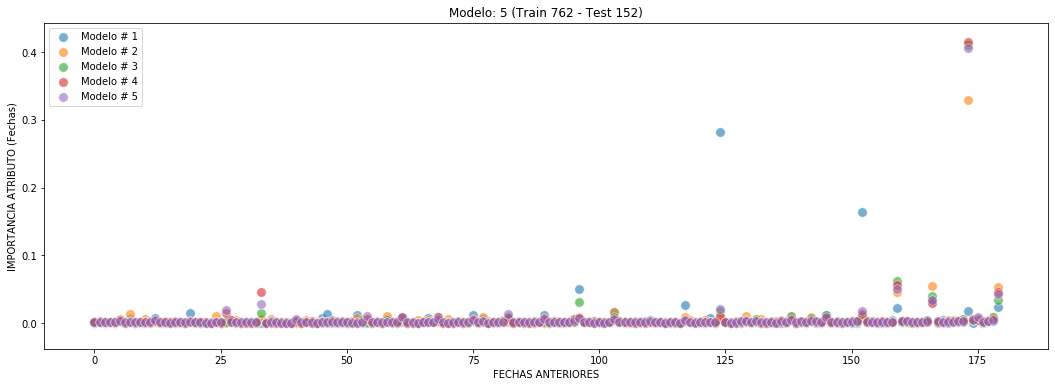

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Configuracion
i=0
errores = []
dd = {}
print("\n")
plt.figure(figsize=(18,6))


for train_index, test_index in tss.split(X):
    i+=1
    
    # Defino Kfold de Serie de Tiempo
    print(f"TRAIN # {i}:", train_index.shape, "TEST:", test_index.shape)
    X_train, X_test = X[train_index], X[test_index]    
    y_train, y_test = y[train_index], y[test_index]
    
    # Calibro modelo sobre cada split
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1).fit(X_train,y_train)
    
    # Calculo de Benchmark: dia anterior para cada corte
    benchmark =  y[test_index - 1] # un dia menos para todos los indices
    
    # Prediccion y medicion de errores
    y_test_pred = rf.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    errores.append(error)
    error_benchmark = np.sqrt(mean_squared_error(y_test, benchmark))
    
    # Guardo importancias en Dataframes para explorar
    df=pd.DataFrame({'IMPORTANCIA':rf.feature_importances_ , 'error':error})
    dd[f'split_{i}'] = df
    
    # Grafico Consolidado - Feature importances de cada modelo
    sns.scatterplot(x=np.arange(rf.feature_importances_.size), y=rf.feature_importances_, alpha = 0.6, label=f"Modelo # {i}", s=90)
    plt.title(f"Modelo: {i} (Train {train_index.shape[0]} - Test {test_index.shape[0]})")
    plt.xlabel("FECHAS ANTERIORES"); plt.ylabel("IMPORTANCIA ATRIBUTO (Fechas)")
    
    # Impresion resultados
    print(f"    --> Error Modelo: RMSE: {error}")
    print(f"    --> Error Benchmark - Dia anterior: {error_benchmark}")
    print(f"    --> Diferencia = Modelo - Bench : {error-error_benchmark}")
    
    
cv = np.mean(errores)
print("\n\n", f"CROSS VALIDATION SCORE: {cv}")

Como podemos ver la mayoria de los dias no tienen importancia significativa. Sin embargo, de manera esperable, son las fechas mas cercanas al valor a predecir (las de index mas alto) los atributos mas importantes para determinar el valor de la prediccion, a lo largo de los distintos splits realizados en Cross Validation. El error promedio de $Cross Validation = 5092.73$ que compararemos con el Benchmark. Dejando de lado el primer corte, podemos ver como a medida que aumentan los registros de Train a partir del 2do split, ciertas fechas lejanas en el tiempo (originalmente identificadas como importantes; fecha ~125, fecha ~150) se calibran y reducen su importancia, mientras que otras, mas cercanas a la fecha a predecir, ganan peso y aumentan la misma importancia. 

#### Comparación y Conclusiones contra Benchmark:
Vemos por otro lado que en general este primer modelo, sin optimizar, es de por si mejor que el benchmark elegido (el dia inmediatamente anterior)

#### Relevancia de los atributos - Feature Importances:
Exploraremos uno a uno para cada split de Serie de Tiempo, los atributos mas importantes rescatados en cada modelo. Para así encontrar patrones e indentificar cuales son los atributos mas repetidos y por ende mas relevantes para la prediccion y el modelo final objetivo: 

In [56]:
import re

# Selecciono resultados de Importancias de cada split
importancias_cv = [x for x in dd.keys() if re.search(r'split_\d$', x)]

for cv in importancias_cv: 
    dd[cv]['dia_anterior'] = dd['split_5'].index.values -180
    print(f"CV: {cv}")
    display(dd[cv].sort_values(by='IMPORTANCIA', ascending=False).head())


CV: split_1


,IMPORTANCIA,error,dia_anterior
124,0.282501,6452.095261,-56
152,0.164060,6452.095261,-28
96,0.050990,6452.095261,-84
166,0.032789,6452.095261,-14
117,0.027567,6452.095261,-63


CV: split_2


,IMPORTANCIA,error,dia_anterior
173,0.329008,4426.272406,-7
166,0.054832,4426.272406,-14
179,0.052891,4426.272406,-1
159,0.046659,4426.272406,-21
103,0.016982,4426.272406,-77


CV: split_3


,IMPORTANCIA,error,dia_anterior
173,0.410704,5271.3731,-7
159,0.062807,5271.3731,-21
166,0.039937,5271.3731,-14
179,0.034522,5271.3731,-1
96,0.031412,5271.3731,-84


CV: split_4


,IMPORTANCIA,error,dia_anterior
173,0.414450,4868.586223,-7
159,0.055980,4868.586223,-21
33,0.046191,4868.586223,-147
179,0.045640,4868.586223,-1
166,0.029645,4868.586223,-14


CV: split_5


,IMPORTANCIA,error,dia_anterior
173,0.405617,4445.325488,-7
159,0.050166,4445.325488,-21
179,0.043428,4445.325488,-1
166,0.033656,4445.325488,-14
33,0.028133,4445.325488,-147


#### Observación y Conclusiones - Relevancias de los Atributos del Modelo:  

Como se puede observar en los distintos folds de este experimento de Cross Validation, cuando el corte de Entrenamiento Train se amplia, los atributos de muestran una tendencia a ser los mismos. Los atributos mas importantes y repetidos resultan ser las fechas con una periodicidad semanal (7 dias anteriores) el mismo dia de la semana previa, y extensiones sucesivas de la misma logica (2 semanas hacia atras, 3 semanas hacia atras, etc), todos multiplis de 7 dias hacia el pasado. Mientras tanto algo interesante y consistente con modelos de series de tiempo es que en el el tercer/cuarto puesto generalmente se posiciona  _el dia inmediatamente anterior a la fecha objetivo a predecir_ lo cual tiene perfecto sentido a nivel teórico; el valor inmediatamente anterior nos puede dar gran información acerca del nivel general del volumen de tráfico (si está por arriba o por debajo de la media) y por ende es valioso en si mismo. 

A nivel teórico, los valores con distancias semanales, son también _los valores 'estacionales' más cercanos a la fecha objetivo_, por ende respetan la misma lógica anterior, de proveer información muy util al modelo para la prediccion final. Estos, nos permiten observar los valores de un dia de la semana especifico y su nivel general en semanas pasadas, luego incorporar la informacion del volumen de tráfico del dia anteriory con esto corregir o ajustar la prediccion particular del modelo, en caso que se mueve un poco ciclo estacional o la tendencia general.

### Optimizacion Hiperparametros  
Esta seccion se orienta a responder a la pregunta ¿Que hiperparámetros de nuestro modelo de Random forest pueden calibrar mejor nuetro modelo? EL objetivo es tomar el modelo básico anterior y encontrar los hiperparámetros que mejoren la performance. Para eso realizaremos pruebas utilizando la herramienta `GridSearchCV` de `scikitlearn` y como estrategia de cross validation usaremos `cv=tss (Time Series Cross validacion)` :

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[2,10,20,50,100,150,180,200,250,350]}
rf = RandomForestRegressor(random_state=42, n_jobs = -1)
# Incorporamos el corte de TimeSeriesSplit en CV como separador (objeto 'tss') 
model = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=tss, n_jobs=-1)
model.fit(X,y)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
  

#### GridSearch - Algoritmo de búsqueda y optimización de hiperparámetros: 
Podemos ver que los mejores resultados corresponden a los siguientes (en orden)

In [58]:
res = pd.DataFrame(model.cv_results_).sort_values(by='param_n_estimators'); res['RMSE']=np.sqrt(res.mean_test_score*-1)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,RMSE
0,0.235968,0.159411,0.170741,0.066820,2,{'n_estimators': 2},-4.367688e+07,-3.048198e+07,-3.685776e+07,-4.046478e+07,-3.788383e+07,-3.787305e+07,4.383155e+06,10,6154.108068
1,0.484778,0.178985,0.363066,0.279144,10,{'n_estimators': 10},-4.439451e+07,-2.321347e+07,-2.731680e+07,-2.352513e+07,-2.438063e+07,-2.856611e+07,8.045863e+06,9,5344.727339
2,0.979644,0.443144,0.827602,0.537181,20,{'n_estimators': 20},-4.565662e+07,-2.141634e+07,-2.773132e+07,-2.338114e+07,-2.161363e+07,-2.795981e+07,9.135474e+06,8,5287.703744
3,2.788898,0.985942,1.487131,0.812323,50,{'n_estimators': 50},-4.284104e+07,-1.975309e+07,-2.796556e+07,-2.429011e+07,-2.015718e+07,-2.700139e+07,8.468250e+06,7,5196.286481
4,5.866247,3.140247,2.849557,0.352016,100,{'n_estimators': 100},-4.162953e+07,-1.959189e+07,-2.778737e+07,-2.370313e+07,-1.976092e+07,-2.649457e+07,8.142723e+06,5,5147.287548
5,10.497312,4.354308,3.192785,0.440512,150,{'n_estimators': 150},-4.231194e+07,-1.981252e+07,-2.755048e+07,-2.333208e+07,-1.996588e+07,-2.659458e+07,8.349001e+06,6,5156.993454
6,12.627410,4.910304,4.961660,3.524343,180,{'n_estimators': 180},-4.203502e+07,-1.962631e+07,-2.738270e+07,-2.322286e+07,-1.991698e+07,-2.643677e+07,8.287576e+06,3,5141.670363
7,13.018041,4.047319,4.391718,3.451179,200,{'n_estimators': 200},-4.176573e+07,-1.970493e+07,-2.750529e+07,-2.326928e+07,-1.999959e+07,-2.644896e+07,8.159729e+06,4,5142.855623
8,14.132495,4.600253,5.047079,3.971355,250,{'n_estimators': 250},-4.181672e+07,-1.976110e+07,-2.719323e+07,-2.345272e+07,-1.995559e+07,-2.643587e+07,8.155855e+06,2,5141.582675
9,16.464707,6.514853,2.317034,1.793635,350,{'n_estimators': 350},-4.155059e+07,-1.980717e+07,-2.726288e+07,-2.348823e+07,-1.998178e+07,-2.641813e+07,8.042646e+06,1,5139.857028


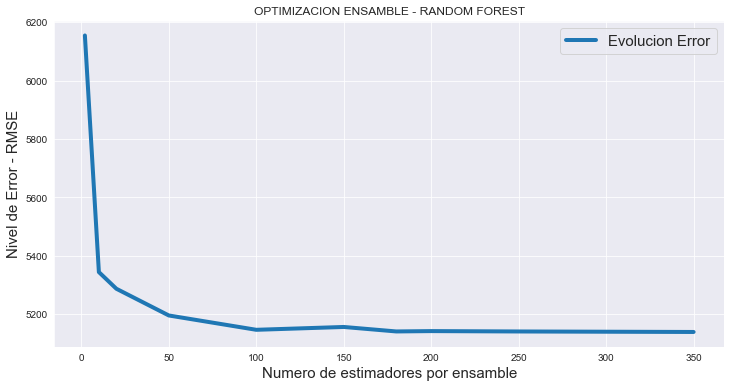

In [59]:
sns.set_style(style='darkgrid'); plt.figure(figsize=(12,6)); plt.title("OPTIMIZACION ENSAMBLE - RANDOM FOREST");
plt.xlabel("Numero de estimadores por ensamble", fontsize=15); plt.ylabel("Nivel de Error - RMSE", fontsize=15)
sns.lineplot(x=res.param_n_estimators, y=np.sqrt(res.mean_test_score*-1), label="Evolucion Error", lw=4);
plt.legend(fontsize=15)

#### GridSearch - Resultados generales:  
Podemos ver que a medida que los estimadores por ensamble llegan aproximadamente ~100 (2/3 de la cantidad de atributos), en nivel de error se estabiliza. Es decir, no existe una mejora sustancial de complejizar el modelo y agregar mayor cantidad de estimadores al ensamble. Esta configuracion pareceria capturar "la generalidad" del comportamiento de los datos de manera apropiada, captando tanto el comportamiento ciclico, estacional y la tendencia de una manera optima, por lo menos para esta estrategia y modelo. 

A partid de ahi, no hay ganancias significativas que justifiquen el aumento de los mismos para el mismo.

### Modelo Final - Implementacion sobre conjunto reservado de Test:  
Habiendo validado anteriormente la consistentica e interpretacion del modelo, cuales son los atributos importantes y como opera, y encontrado un mejor conjunto de hiperparámetros para laconfiguración del mismo, ahora queda armar el modelo final y realizar un testeo final para ver la performance del mismo y si logramos el objetivo de un modelo mejor que el benchmark, y optimo:

In [61]:
# Split de Test; Elijo los ultimos 92 dias (ultimo trimestre de 2019 sobre matriz X valida)
dias_a_predecir = 92
X_test = X[-dias_a_predecir:] ; y_test = y[-dias_a_predecir:]

# Split de Train; fechas anteriores disponibles 
X_train = X[:-dias_a_predecir] ; y_train = y[:-dias_a_predecir]

# Entrenamiento 
rf = RandomForestRegressor(n_estimators = 100, random_state=42, n_jobs = -1)
model = rf.fit(X_train, y_train)

# Prediccion 
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Testeo final
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


# # Train test split
# N_train = 36*30 - look_back # 36 meses, longitud serie de entrenamiento
# N_test = 3*30 # e meses, evaluacion 
# N_total = N_train + N_test # distancia total de test/train split (sin contar lookback)
# cantidad_meses_hasta_train = diario['2017-01-01':'2019-12-31'].shape[0]/30; cantidad_meses_hasta_train

#### Resultado Modelo - Error

El errror final del modelo una vez calibrado es: 

In [62]:
print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")

RMSE train: 1716.116537637524
RMSE test: 4851.404005951644


#### Comparacion Benchmark vs Modelo

In [63]:
len(y_test_pred)

92

In [64]:
# Benchmark dia anterior
y_benchmark = y[-dias_a_predecir-1:-1]
rmse_benchmark = np.sqrt(mean_squared_error(y_test, y_benchmark ))
print(f"RMSE test benchmark: {rmse_benchmark}")

RMSE test benchmark: 6810.747635810304


El error del modelo es un 28.76% menor, en comparacion con el error del Benchmark, realizadd con el dia inmediato anterior.

#### Grafico Predicciones

## Dificil - Graficado Final de Predicciones - Modelo

In [65]:
plt.figure(figsize=(25,4))

# sns.lineplot(x=np.arange(len(, y=y)

grafico = diario[['cantidad_pasos']].copy()
# grafico['x_train_pred'] = graico.iloc[180:]

grafico.loc[-dias_a_predecir:,'y_test_pred']=y_test_pred
grafico.loc[180:-92, 'fl_x_train'] = 1
grafico.loc[180:-92, 'x_train_pred'] = y_train_pred
grafico.query('fl_x_train == 1')

# sns.lineplot(x=np.arange(len(y_train)), y=y_train, lw=0.3, ls='--')
# sns.lineplot(x=np.arange(len(y_train_pred)), y=y_train_pred, lw=0.5)


ValueError: could not broadcast input array from shape (822) into shape (823)

<Figure size 1800x288 with 0 Axes>

## FACIL

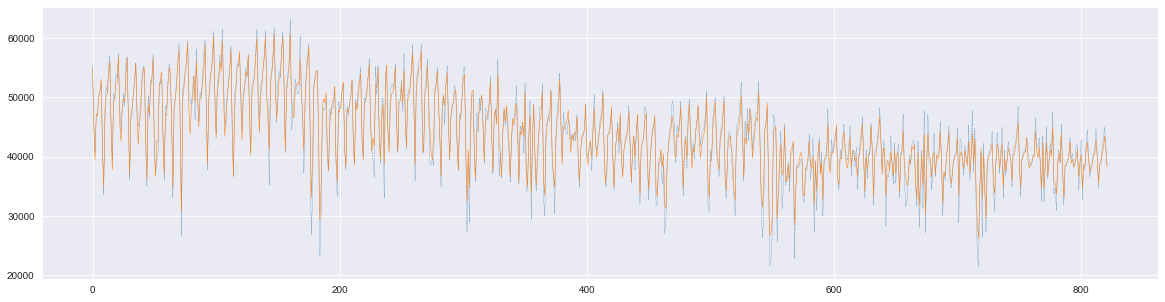

In [66]:

plt.figure(figsize=((20,5)))
# entrenamiento
sns.lineplot(x=np.arange(len(y_train)), y=y_train, lw=0.3, ls='--')
#entrenamiento predict
sns.lineplot(x=np.arange(len(y_train_pred)), y=y_train_pred, lw=0.5)

# LISTA PENDIENTES:  

IMPORTANTE
    # Hacer modelo final
    # Hacer Benchmark final

##########################################

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.

    Haz todas las transformaciones de datos que consideres necesarias. Justifica.
    Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
    Elige un modelo benchmark y compara tus resultados con este modelo.
    Optimiza los hiperparámetros de tu modelo.
    Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
    Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
    Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

Para pensar, investigar y, opcionalmente, implementar

    ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
    ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
    ¿Hay algo que te gustaría investigar o probar?

##########################################


Innecesario
    # Entender porque ::-1 reindexa mal -->     #dd[f'split_{i}_rein'] = df.reindex(index=(res.index[::-1]))
    # Ver si tengo que sacar tendencia
    # buscar como obtener el integer de cada index y trasnformarlo a valor texto
      
Pandas
    # Como Mappear una constante a lo largo de todo un dataframe

_______________

## PARTE C: INVESTIGACION - NUEVAS IDEAS Y ENFOQUES  
En esta sección abordaremos la aplicacion de nuevos enfoques para la resolución del problema planteado por esta entrega. Desarrollaremos aplicaciones de una manera diferente a los modelos anteriores (modelos vistos en clase) utilizando otras estrategias o recurosos y evaluando su desempeño. Para eso investigaremos `Prophet` de Facebook, para saber que podemos replicar o mejorar con esta librería de lo anterior. Y pensaremos también alguna modificacion sobre los modelos crudos anteriores, evaluando su despempeño antes de hacer una conclusión final.

Material teorico de Series de tiempo en Python // Seccion Profundiza: // https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html  
https://community.dataquest.io/t/how-to-split-time-series-data-into-training-and-test-set/4116/2  
https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e  
https://medium.com/@jonduke90/analyzing-steam-reviews-and-users-data-7a4ff3c5ce1a  


____________
# Listado de PENDIENTES:  
+  Incorporar feriados Tomy
+ Incorporar test `adfuller` de estacionariedad /tendencia

In [ ]:




# Feriados Tomy
#holidays2017=['2017-01-01','2017-02-27','2017-02-28','2017-03-28','2017-04-02','2017-04-13','2017-04-14','2017-05-01','2017-06-17','2017-06-20','2017-07-09','2017-08-17','2017-10-12','2017-11-20','2017-12-08','2017-12-25']
#holidays2018=['2018-01-01','2018-02-12','2018-02-13','2018-03-24','2018-03-30','2018-04-02','2018-04-30','2018-05-01','2018-05-25','2018-06-17','2018-06-20','2018-07-09','2018-08-20','2018-10-15','2018-11-19','2018-12-08','2018-12-24','2018-12-25','2018-12-31']
#holidays2019=['2019-01-01','2019-03-04','2019-03-05','2019-03-24','2019-04-02','2019-04-18','2019-04-19','2019-05-01','2019-05-25','2019-06-17','2019-06-20','2019-07-08','2019-07-09','2019-08-17','2019-08-19','2019-10-12','2019-10-14','2019-11-18','2019-12-08','2019-12-25']


In [60]:
# PRUEBAS DE CORTES ARRAYS 

numeros = [1,2,3,4,5,6,7,8,9,10]; #print(numeros, "\n")
print("numeros[-10:-4]", '\n')
print("desde -9 (inclusivo) hasta -4 (no inclusivo)")
display(numeros[-9:-4])
print("")

print("numeros[-5:10]", '\n')
print("desde 5 (inclusivo) hasta -2 (no inclusivo)")
display(numeros[-5:-2])


numeros[-10:-4] 

desde -9 (inclusivo) hasta -4 (no inclusivo)


[2, 3, 4, 5, 6]


numeros[-5:10] 

desde 5 (inclusivo) hasta -2 (no inclusivo)


[6, 7, 8]